In [106]:
import numpy as np
#import pandas_profiling
import pandas as pd
%matplotlib inline

In [107]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [108]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

In [109]:
df_total = pd.read_csv('df_total1.csv')
df_total

,Unnamed: 0,Animal_ID,Name,DateTime_Intake,Found_Location,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,0,a786884,*brock,2019-01-03 04:19:00,2501 magin meadow dr in austin (tx),stray,normal,dog,2.000000,yes,...,male,yes,non-adopted,4.0,small,agreeable,family_dog,frequent,medium_high,hound_group
1,1,a706918,belle,2015-07-05 12:59:00,9409 bluegrass dr in austin (tx),stray,normal,dog,8.000000,no,...,female,yes,adopted,0.0,medium,pleaser,Not_define,medium,medium_low,sporting_group
2,2,a724273,runster,2016-04-14 06:43:00,2818 palomino trail in austin (tx),stray,normal,dog,0.916667,yes,...,male,yes,adopted,6.0,small,independent,apartment_friendly,rare,medium_high,hound_group
3,3,a665644,unknown,2013-10-21 07:59:00,austin (tx),stray,sick,cat,0.076660,yes,...,female,no,non-adopted,0.0,Unknown,Unknown,Not_define,Unknown,not_define,not_define
4,4,a682524,rio,2014-06-29 10:38:00,800 grove blvd in austin (tx),stray,normal,dog,4.000000,no,...,male,yes,adopted,2.0,large,pleaser,guard_dog,medium,high,working_group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,110490,a830164,unknown,2021-03-03 02:17:00,travis (tx),owner surrender,normal,dog,0.083333,yes,...,unknown,unknown,non-adopted,0.0,small,agreeable,family_dog,rare,medium_low,toy_group
109117,110491,a829701,pee wee,2021-02-21 02:56:00,16201 biltmore avenue in travis (tx),stray,normal,dog,3.000000,no,...,male,no,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109118,110492,a765174,carson,2018-01-14 11:31:00,austin (tx),owner surrender,normal,dog,0.083333,yes,...,male,yes,adopted,0.0,xsmall,independent,apartment_friendly,very_common,medium_low,toy_group
109119,110493,a829868,remy,2021-02-25 11:40:00,valdez in austin (tx),stray,normal,dog,1.000000,no,...,male,yes,adopted,5.0,small,agreeable,family_dog,frequent,medium_high,hound_group


# Preparing Data

In [110]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            109121 non-null  int64  
 1   Animal_ID             109121 non-null  object 
 2   Name                  109120 non-null  object 
 3   DateTime_Intake       109121 non-null  object 
 4   Found_Location        109121 non-null  object 
 5   Intake_type           109121 non-null  object 
 6   Intake_Condition      109121 non-null  object 
 7   Animal_Type           109121 non-null  object 
 8   Age_upon_Intake       109121 non-null  float64
 9   Mix_Breed             109121 non-null  object 
 10  Primary_Breed         109121 non-null  object 
 11  Secondary_Breed       109121 non-null  object 
 12  Main_Color            109121 non-null  object 
 13  Secondary_Color       109121 non-null  object 
 14  DateTime_Outcome      109121 non-null  object 
 15  

In [111]:
# csv created this
df_total = df_total.drop('Unnamed: 0',1)

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\2350378753.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [112]:
cols_cat = ['Intake_type','Intake_Condition','Mix_Breed','Primary_Breed','Secondary_Breed','Main_Color','Secondary_Color','Sex','neuter/spay','Breed_size','Trainability','Breed_characteristic','Barking_level','activity_level','adopted/non-adopted','Outcome_Type','breed_group']
df_total[cols_cat] = df_total[cols_cat].astype('category')

In [113]:
col2 = ['DateTime_Intake','DateTime_Outcome','Date of Birth']
df_total[col2] = df_total[col2].astype('datetime64[ns]')

df_total['Days in Shelter'] = df_total['Days in Shelter'].astype('int')

In [114]:
df_total = df_total.drop('Animal_ID',1)
df_total = df_total.drop('Name',1)
df_total = df_total.drop('Location',1)
df_total = df_total.drop('Found_Location',1)
# Cause multicollinearity or it become irrelevant
df_total = df_total.drop('Outcome_Subtype',1)   #same info of outcome  & multicollinearity
#df_total = df_total.drop('Animal_Type',1)   # only dogs

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\1678915103.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\1678915103.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\1678915103.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\1678915103.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\1678915103.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [115]:
# adopted variable comes from outcome type (group in two)
#df_total = df_total.drop('Outcome Type', axis = 1)
df_total = df_total.drop('Outcome_Type', axis = 1)

In [116]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109121 entries, 0 to 109120
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DateTime_Intake       109121 non-null  datetime64[ns]
 1   Intake_type           109121 non-null  category      
 2   Intake_Condition      109121 non-null  category      
 3   Animal_Type           109121 non-null  object        
 4   Age_upon_Intake       109121 non-null  float64       
 5   Mix_Breed             109121 non-null  category      
 6   Primary_Breed         109121 non-null  category      
 7   Secondary_Breed       109121 non-null  category      
 8   Main_Color            109121 non-null  category      
 9   Secondary_Color       109121 non-null  category      
 10  DateTime_Outcome      109121 non-null  datetime64[ns]
 11  Date of Birth         109121 non-null  datetime64[ns]
 12  Age_upon_Outcome      109121 non-null  float64       
 13 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X_en= df_total.iloc[cols].values
X_en = labelencoder.fit_transform(X_en)

# Label Encoder

In [117]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
for i in df_total.columns:
    df_total[i] = labelencoder.fit_transform(df_total[i])
df_total

,DateTime_Intake,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,...,Sex,neuter/spay,adopted/non-adopted,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,58071,4,5,2,18,1,35,126,55,37,...,1,2,1,4,3,1,2,1,2,1
1,20527,4,5,2,24,0,131,126,56,34,...,0,2,0,0,2,4,0,3,3,5
2,28844,4,5,2,16,1,32,126,46,51,...,1,2,0,6,3,3,1,4,2,1
3,725,4,9,1,4,1,119,126,21,37,...,0,0,1,0,0,0,0,0,4,3
4,8742,4,5,2,20,0,116,16,51,29,...,1,2,0,2,1,4,3,3,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109116,76109,2,5,2,5,1,266,126,2,51,...,2,1,1,0,3,1,2,4,3,8
109117,76044,4,5,2,19,0,89,126,15,37,...,1,0,0,0,5,3,1,5,3,8
109118,47858,2,5,2,5,1,89,126,51,51,...,1,2,0,0,5,3,1,5,3,8
109119,76083,4,5,2,17,0,35,109,55,37,...,1,2,0,5,3,1,2,1,2,1


In [118]:
x = df_total.drop('adopted/non-adopted', 1)
y = df_total['adopted/non-adopted']
x.head()

C:\Users\diedr\AppData\Local\Temp\ipykernel_2468\4183125591.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



,DateTime_Intake,Intake_type,Intake_Condition,Animal_Type,Age_upon_Intake,Mix_Breed,Primary_Breed,Secondary_Breed,Main_Color,Secondary_Color,...,Age_upon_Outcome,Sex,neuter/spay,Days_in_shelter,Breed_size,Trainability,Breed_characteristic,Barking_level,activity_level,breed_group
0,58071,4,5,2,18,1,35,126,55,37,...,17,1,2,4,3,1,2,1,2,1
1,20527,4,5,2,24,0,131,126,56,34,...,23,0,2,0,2,4,0,3,3,5
2,28844,4,5,2,16,1,32,126,46,51,...,16,1,2,6,3,3,1,4,2,1
3,725,4,9,1,4,1,119,126,21,37,...,4,0,0,0,0,0,0,0,4,3
4,8742,4,5,2,20,0,116,16,51,29,...,19,1,2,2,1,4,3,3,0,9


In [119]:
x.columns

Index(['DateTime_Intake', 'Intake_type', 'Intake_Condition', 'Animal_Type',
       'Age_upon_Intake', 'Mix_Breed', 'Primary_Breed', 'Secondary_Breed',
       'Main_Color', 'Secondary_Color', 'DateTime_Outcome', 'Date of Birth',
       'Age_upon_Outcome', 'Sex', 'neuter/spay', 'Days_in_shelter',
       'Breed_size', 'Trainability', 'Breed_characteristic', 'Barking_level',
       'activity_level', 'breed_group'],
      dtype='object')

# One Hot Encoder

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_total).toarray())

df_total = enc_df
df_total

# LASSO: Selected features

In [120]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)
lasso = LassoCV(cv=skf, random_state=42).fit(x, y)
print('Selected Features:', list(x.columns[np.where(lasso.coef_!=0)[0]]))


Selected Features: ['DateTime_Intake', 'Primary_Breed', 'DateTime_Outcome', 'Date of Birth', 'Days_in_shelter']


D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.831e+03, tolerance: 2.645e+00



In [121]:
#from pygments.lexers import go
import plotly.graph_objects as go
#from matplotlib.pyplot import figure as fig



fig = go.Figure(
    go.Waterfall(name= "Lasso Coefficients",
                 orientation= "h",
                 y = x.columns.values,
                 x = lasso.coef_))
fig.update_layout(title = "Coefficients of Lasso Regression Model")
fig.show()

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

lr = LogisticRegression(C=10, class_weight='balanced', random_state=42)
preds = cross_val_predict(lr, x[:, np.where(lasso.coef_!=0)[0]], y, cv=skf)
print(classification_report(y, preds))

https://dev.to/charfaouiyounes/hands-on-with-feature-selection-techniques-embedded-methods-3oo1

# Regularization "l2"

In [123]:
from sklearn.feature_selection import SelectFromModel

# using regression with penalty l1

selection = SelectFromModel(LogisticRegression(C=1,penalty='l2'))
selection.fit(x,y)

D:\Data Analysis and Science\Data Manipulation\Plataforms\Python\Python Base Original\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SelectFromModel(estimator=LogisticRegression(C=1))

from sklearn.feature_selection import SelectFromModel

# using regression with penalty l1

selection = SelectFromModel(KNeighborsClassifier())
selection.fit(x,y)

In [124]:
# see the selected features
selected_features = x.columns[(selection.get_support())]
selected_features

Index(['Main_Color', 'Secondary_Color', 'Date of Birth', 'Days_in_shelter'], dtype='object')

# see the deleted features
removed_features = x.columns[(selection.estimator_.coef_ == 0).ravel().tolist()]
removed_features

# Tree-based Feature importance (Random Forest)

In [125]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest
model = RandomForestClassifier(n_estimators=340)

# fit the model
model.fit(x,y)

# get the importance of the resulting feature
importances = model.feature_importances_

In [135]:

# create a dataframe for viz
final_df = pd.DataFrame({'Features':x.columns,"Importances": importances})
final_df.set_index('Features')

# ascending order viz
final_df = final_df.sort_values('Importances')
final_df

,Features,Importances
5,Mix_Breed,0.007247
7,Secondary_Breed,0.009169
21,breed_group,0.010270
3,Animal_Type,0.011089
18,Breed_characteristic,0.011498
16,Breed_size,0.016897
19,Barking_level,0.018466
9,Secondary_Color,0.020920
2,Intake_Condition,0.021117
17,Trainability,0.021887


<AxesSubplot:xlabel='Features'>

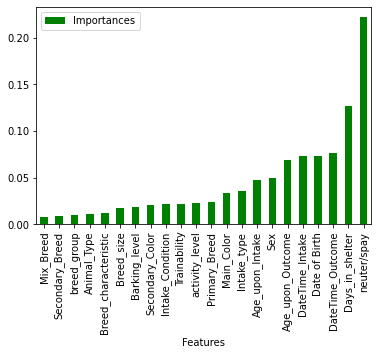

In [142]:
final_df.plot.bar(x = 'Features', color = 'green')